<a href="https://colab.research.google.com/github/kevvinnn/KaggleObesityDataset/blob/main/KaggeObesityTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trainObesity.csv')

In [ ]:
df['FCVC'] = df['FCVC'].round()
df['NCP'] = df['NCP'].round()
df['CH2O'] = df['CH2O'].round()
df['FAF'] = df['FAF'].round()
df['TUE'] = df['TUE'].round()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[object]).columns

In [ ]:
'''df['Age Group'] = pd.cut(df['Age'], bins= [0,15,30,45,60,75], labels=['0-15','16-30','31-45','46-60','60-75'])
df = df.drop('Age', axis=1)'''

<Axes: xlabel='Age', ylabel='count'>

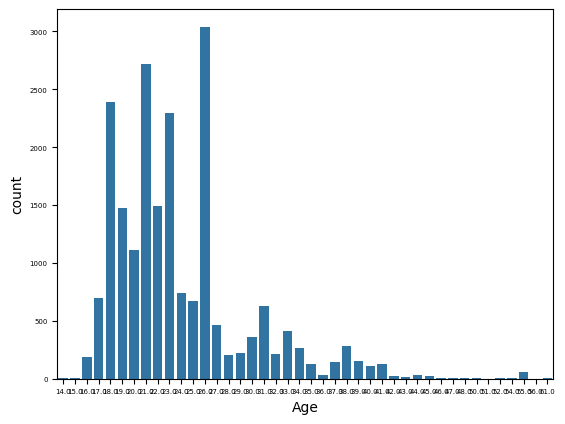

In [ ]:
r = sns.countplot(x=df['Age'].round(), data=df)
r.tick_params(labelsize=5)
r

<Axes: >

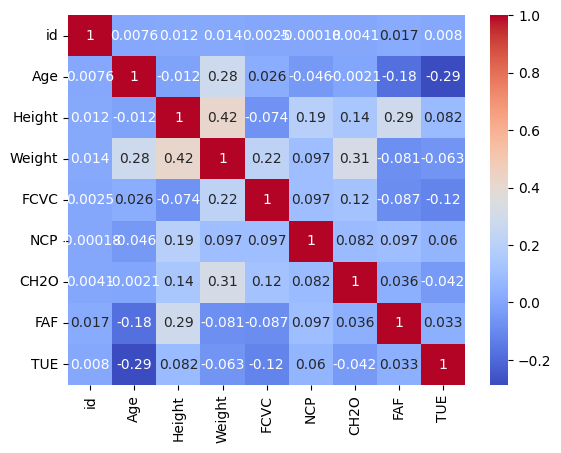

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

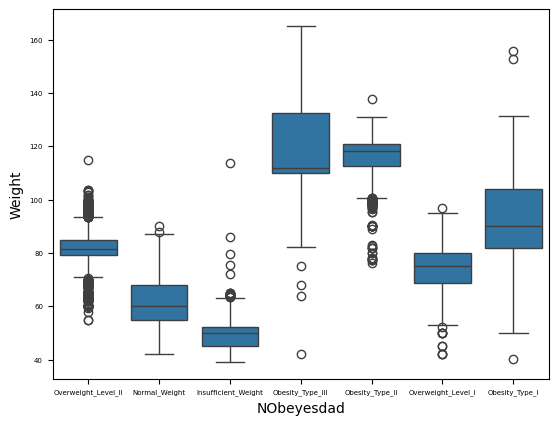

In [ ]:
r = sns.boxplot(x='NObeyesdad', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='NObeyesdad', ylabel='Height'>

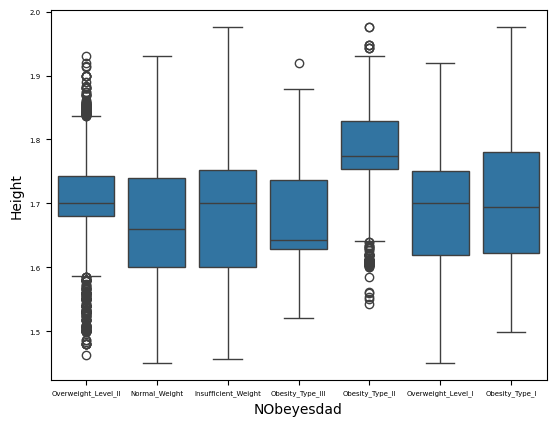

In [ ]:
r = sns.boxplot(x='NObeyesdad', y='Height', data=df)
r.tick_params(labelsize=5)
r

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

<Axes: xlabel='family_history_with_overweight', ylabel='Weight'>

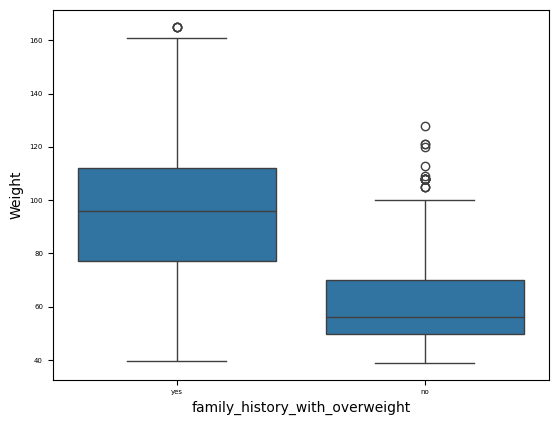

In [ ]:
r = sns.boxplot(x='family_history_with_overweight', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='FAVC', ylabel='Weight'>

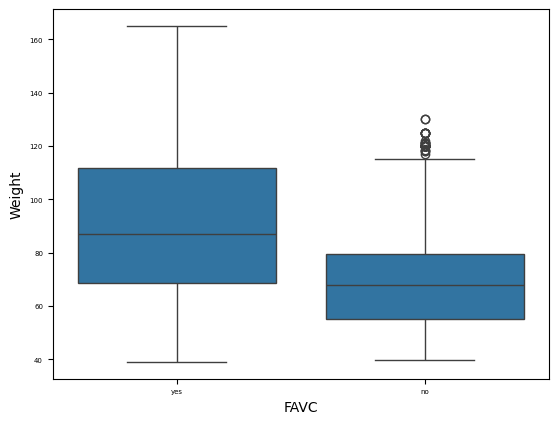

In [ ]:
r = sns.boxplot(x='FAVC', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='FCVC', ylabel='Weight'>

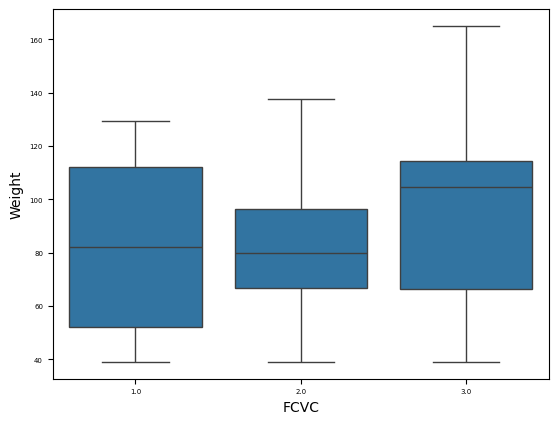

In [ ]:
r = sns.boxplot(x='FCVC', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='NCP', ylabel='Weight'>

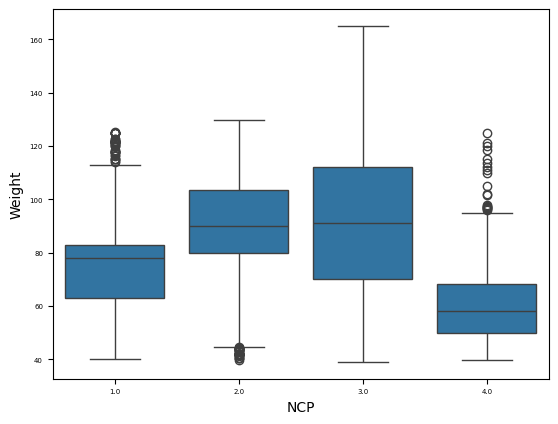

In [ ]:
r = sns.boxplot(x='NCP', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='CAEC', ylabel='Weight'>

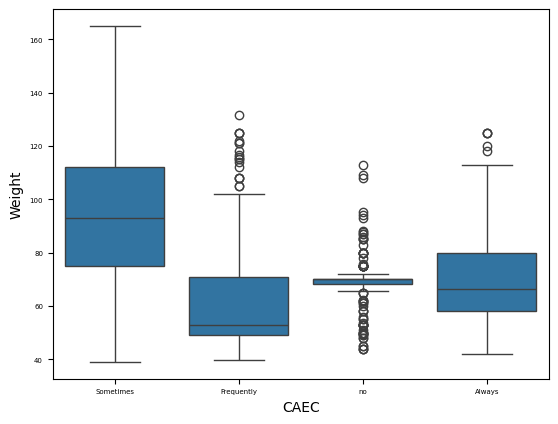

In [ ]:
r = sns.boxplot(x='CAEC', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='SMOKE', ylabel='Weight'>

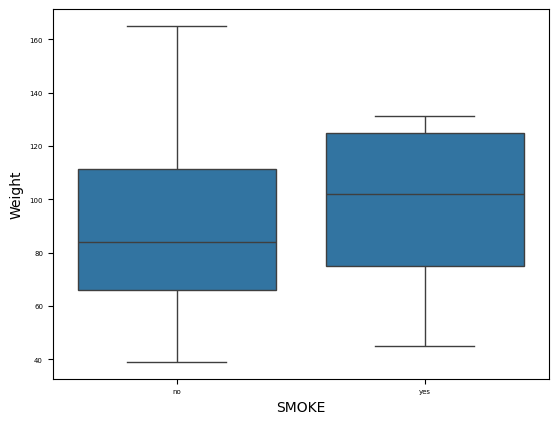

In [ ]:
r = sns.boxplot(x='SMOKE', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='CH2O', ylabel='Weight'>

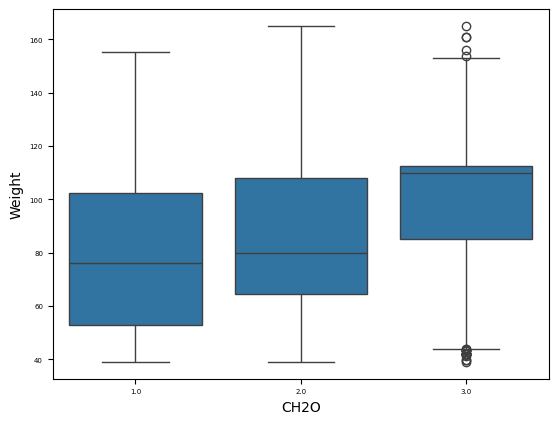

In [ ]:
r = sns.boxplot(x='CH2O', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='SCC', ylabel='Weight'>

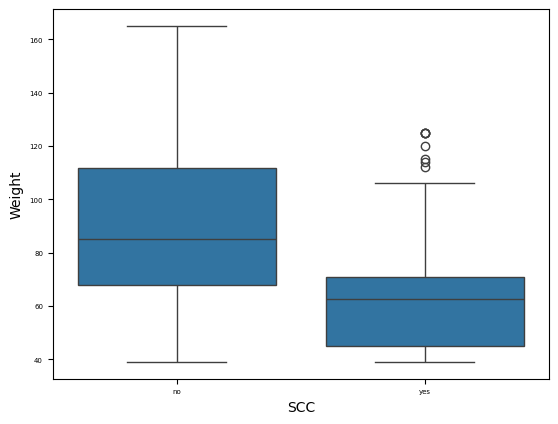

In [ ]:
r = sns.boxplot(x='SCC', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='FAF', ylabel='Weight'>

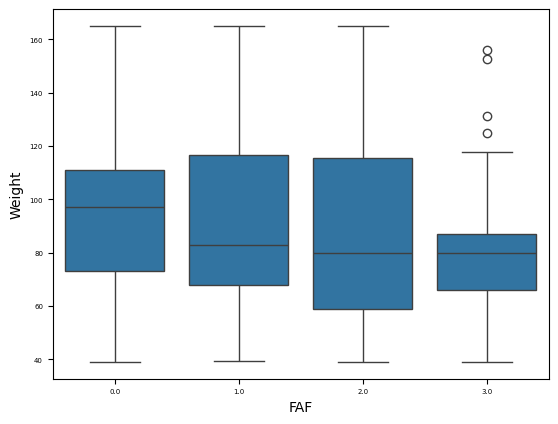

In [ ]:
r = sns.boxplot(x='FAF', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='CALC', ylabel='Weight'>

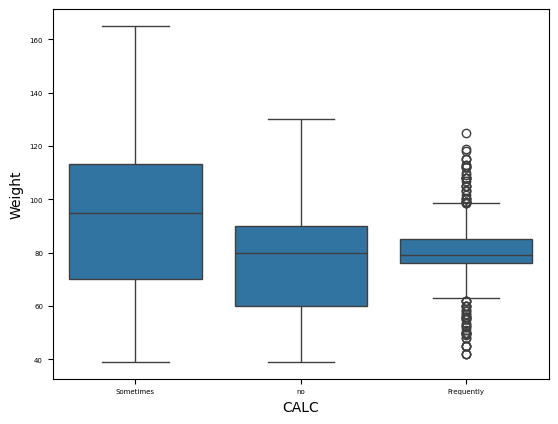

In [ ]:
r = sns.boxplot(x='CALC', y='Weight', data=df)
r.tick_params(labelsize=5)
r

<Axes: xlabel='MTRANS', ylabel='Weight'>

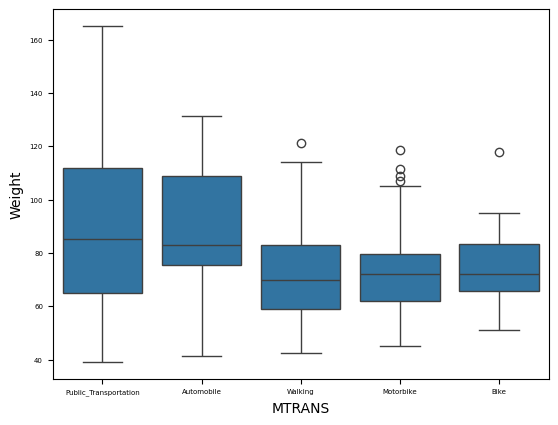

In [ ]:
r = sns.boxplot(x='MTRANS', y='Weight', data=df)
r.tick_params(labelsize=5)
r

In [71]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trainObesity.csv')
'''df['Age'] = np.log1p(df['Age'])'''
'''df['BMI'] = (df['Weight'] / df['Height']) ** 2'''
#BMI  and Log Age didn't help accuracy

"df['BMI'] = (df['Weight'] / df['Height']) ** 2"

In [72]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = categorical_features.drop('NObeyesdad')
numerical_features = numerical_features.drop('id')

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, categorical_features),
    ('num_pipeline', num_pipeline, numerical_features)],
    remainder='passthrough'
)

X = df.drop('NObeyesdad', axis=1)

label_enc = LabelEncoder()
y = label_enc.fit_transform(df['NObeyesdad'])

df_prepared = preprocessor.fit_transform(X)

<Axes: >

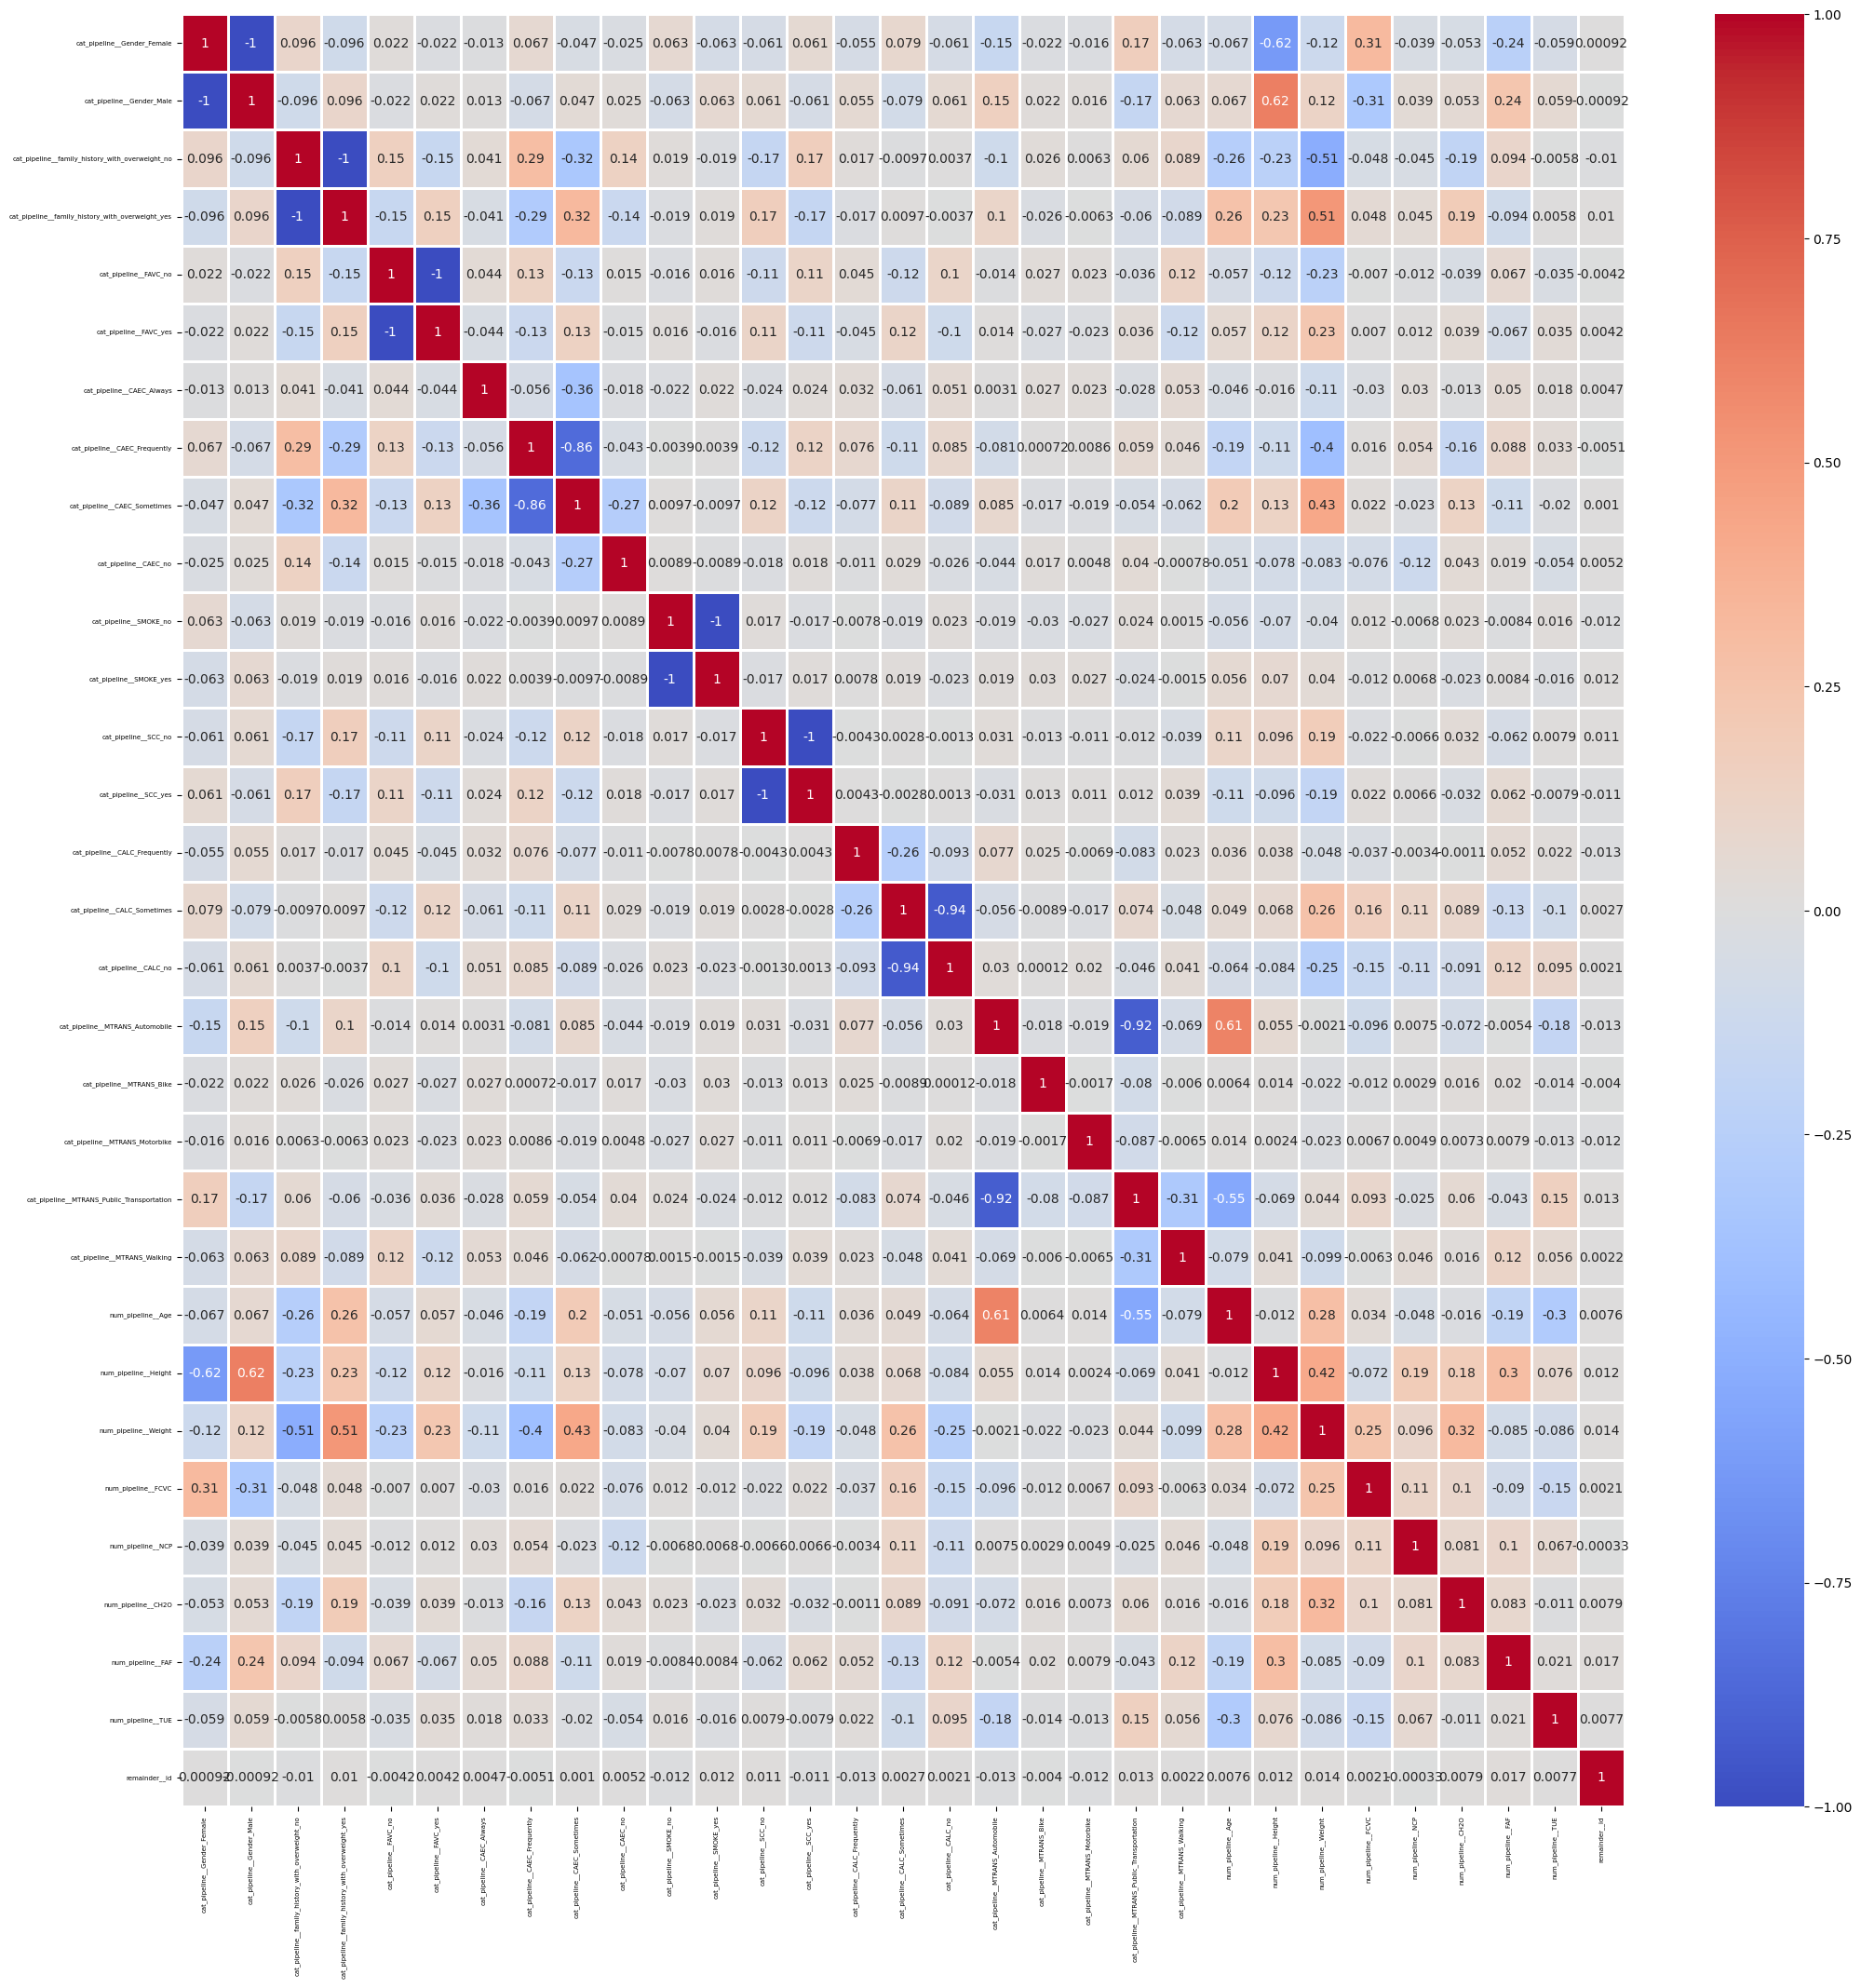

In [92]:
import matplotlib.pyplot as plt

df_prepared = pd.DataFrame(df_prepared, columns=preprocessor.get_feature_names_out())

fig, ax = plt.subplots(figsize=(25,25))

r = sns.heatmap(df_prepared.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax, linewidths=1)
r.tick_params(labelsize=5)
r

In [ ]:
!pip install catboost

import catboost as cb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal

ModuleNotFoundError: No module named 'catboost'

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_prepared, y, test_size=0.2, random_state=42)

In [86]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()

xgb_param_grid = {
    'n_estimators': [200],
    'max_depth': [4],
    'learning_rate': [0.1],
    'subsample': [.7],
    'colsample_bytree': [0.8],
    'reg_lambda': [2],
    'objective': ['binary:logistic'],
    'max_leaves': [50],
    'max_delta_step': [3]
}

xgb_grid = GridSearchCV(xgb_classifier, xgb_param_grid, cv=4, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_params_)

print(xgb_grid.best_score_)

print(xgb_grid.best_estimator_)

#.907 before any feature engineering
#.9038 after rounding some columns

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_delta_step': 3, 'max_depth': 4, 'max_leaves': 50, 'n_estimators': 200, 'objective': 'binary:logistic', 'reg_lambda': 2, 'subsample': 0.7}
0.9098523018805043
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=3,
              max_depth=4, max_leaves=50, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


In [ ]:
import catboost as cb

cb_classifier = cb.CatBoostClassifier()

cb_param_grid = {
    'iterations': [300],
    'depth': [5],
    'learning_rate': [0.1],
}

cb_grid = GridSearchCV(cb_classifier, cb_param_grid, cv=5, n_jobs=-1)
cb_grid.fit(X_train, y_train)

print(cb_grid.best_params_)

print(cb_grid.best_score_)

print(cb_grid.best_estimator_)

#.901 before feature engineering
#.8995 after rounding

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc_param_grid = {
    'n_estimators': [200],
    'max_depth': [5]
}

rfc_grid = GridSearchCV(rfc, rfc_param_grid, cv=5, n_jobs=-1)
rfc_grid.fit(X_train, y_train)

print(rfc_grid.best_params_)

print(rfc_grid.best_score_)

print(rfc_grid.best_estimator_)

#.792846 before feature engineering
#.7789 after rounding

In [ ]:
from sklearn import svm

svm_classifier = svm.SVC()

svc_param_grid = {
    'C': [10]
}

svc_grid = GridSearchCV(svm_classifier, svc_param_grid, cv=5, n_jobs=-1)
svc_grid.fit(X_train, y_train)

print(svc_grid.best_params_)

print(svc_grid.best_score_)

print(svc_grid.best_estimator_)

#.87 before feature engineering
#.869 after rounding

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [9],
    'weights': ['distance'],
    'algorithm': ['ball_tree']
}

knn_grid = GridSearchCV(knn_classifier, knn_param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)

print(knn_grid.best_score_)

print(knn_grid.best_estimator_)

#.75057 before feature engineering
#.74 after rounding

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_param_grid = {}

gnb_grid = GridSearchCV(gnb, gnb_param_grid, cv=5, n_jobs=-1)
gnb_grid.fit(X_train, y_train)

print(gnb_grid.best_params_)

print(gnb_grid.best_score_)

print(gnb_grid.best_estimator_)

#.584 before feature engineering
#.581 after rounding

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc_param_grid = {
    'max_depth': [8],
    'min_samples_split': [3],
    'min_samples_leaf': [5]
}

dtc_grid = GridSearchCV(dtc, dtc_param_grid, cv=5, n_jobs=-1)
dtc_grid.fit(X_train, y_train)

print(dtc_grid.best_params_)

print(dtc_grid.best_score_)

print(dtc_grid.best_estimator_)

#.8747 before feature engineering
#.872 after rounding

In [87]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/testObesity.csv')

X = df_test

df_test_prepared = preprocessor.transform(X)

In [93]:
y_xgb = xgb_grid.predict(df_test_prepared)
#Best model

y_xgb = label_enc.inverse_transform(y_xgb)

y_xgb_out = df_test[['id']]
y_xgb_out['Nobeyesdad'] = y_xgb
y_xgb_out.to_csv('submissionObesity.csv', index=False)

<ipython-input-93-9349f6e57bd8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_xgb_out['Nobeyesdad'] = y_xgb
